In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from wordcloud import WordCloud

In [3]:
file_path = 'C:\\Users\\danie\\Downloads\\planilla-personal-fijo-enero-diciembre-2023.xlsx'

dataset= pd.read_excel(file_path,sheet_name='PLANILLA PERSONAL ENERO-DI')

dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
1,2,Alexis,Ortega,4-251-335,Director Ejecutivo,3000,NaN,05/10/2023,001,Permanente
2,3,Vanessa,Serrano,8-732-2248,Directora Nacional de Atención al Usuario,3000,NaN,02-09-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente


In [4]:
print(dataset['SXO']=='002')

0       False
1       False
2       False
3       False
4       False
        ...  
5089    False
5090    False
5091    False
5092    False
5093    False
Name: SXO, Length: 5094, dtype: bool


In [63]:
#df1m = dataset["SXO"] != 'SXO' and dataset["SXO"] != '001' and dataset["SXO"] != '002'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
dataset = dataset[dataset.SXO.isin(values)]

In [7]:
dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente
5,7,Yadira,Viluce,8-239-2249,Analista de Normas Eléctricas,1800,M,16-08-1996,001,Permanente
6,8,Nereyda,Arosemena,8-296-453,Secretaria III,1700,M,04-01-1999,001,Permanente


In [8]:
print(dataset.columns)

print(dataset.dtypes)

Index(['Pos.', 'Nombre', 'Apellido', 'Cédula ', 'Cargo', 'Salario Mensual',
       'SXO', 'Inicio de Labores', 'Objeto de Gasto', 'Estatus'],
      dtype='object')
Pos.                 object
Nombre               object
Apellido             object
Cédula               object
Cargo                object
Salario Mensual      object
SXO                  object
Inicio de Labores    object
Objeto de Gasto      object
Estatus              object
dtype: object


In [9]:
print(len(dataset['Nombre'].unique()))

216


Text(0.5, 1.0, 'No. of male and female names in the dataset')

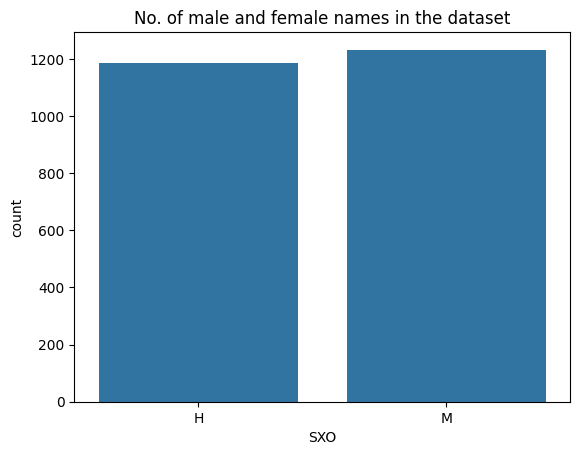

In [10]:
sns.countplot(x='SXO',data = dataset)

plt.title('No. of male and female names in the dataset')

#plt.xticks([0,1,2],('Mujer','Hombre', 'Null'))

In [16]:
dataset = dataset.dropna()

In [11]:
dataset.head()

,Pos.,Nombre,Apellido,Cédula,Cargo,Salario Mensual,SXO,Inicio de Labores,Objeto de Gasto,Estatus
0,1,Armando,Fuentes,2-163-371,Administrador General,3500,H,26-07-2019,001,Permanente
3,5,Noemí,de Pimentel,8-439-55,Director de Asesoría Juridica,5000,M,28-04-2008,001,Permanente
4,6,María,Gormaz,8-492-653,Abogado III,3000,M,17-12-2012,001,Permanente
5,7,Yadira,Viluce,8-239-2249,Analista de Normas Eléctricas,1800,M,16-08-1996,001,Permanente
6,8,Nereyda,Arosemena,8-296-453,Secretaria III,1700,M,04-01-1999,001,Permanente


Text(0.5, 1.0, 'No. of male and female names in the dataset')

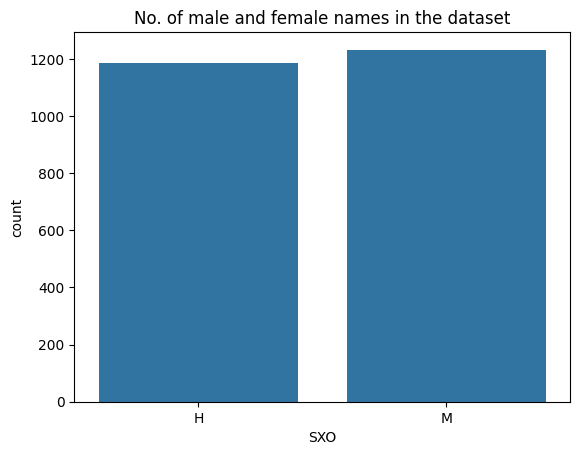

In [13]:
sns.countplot(x='SXO',data = dataset)

plt.title('No. of male and female names in the dataset')

In [14]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dataset[dataset['Nombre'].str.startswith(i)])

print(startletter_count)

{'A': 292, 'B': 66, 'C': 106, 'D': 140, 'E': 232, 'F': 50, 'G': 110, 'H': 30, 'I': 70, 'J': 216, 'K': 30, 'L': 164, 'M': 280, 'N': 70, 'O': 10, 'P': 10, 'Q': 0, 'R': 225, 'S': 90, 'T': 20, 'U': 20, 'V': 20, 'W': 40, 'X': 20, 'Y': 80, 'Z': 10}


Text(0.5, 1.0, 'Number of names starting with each letter')

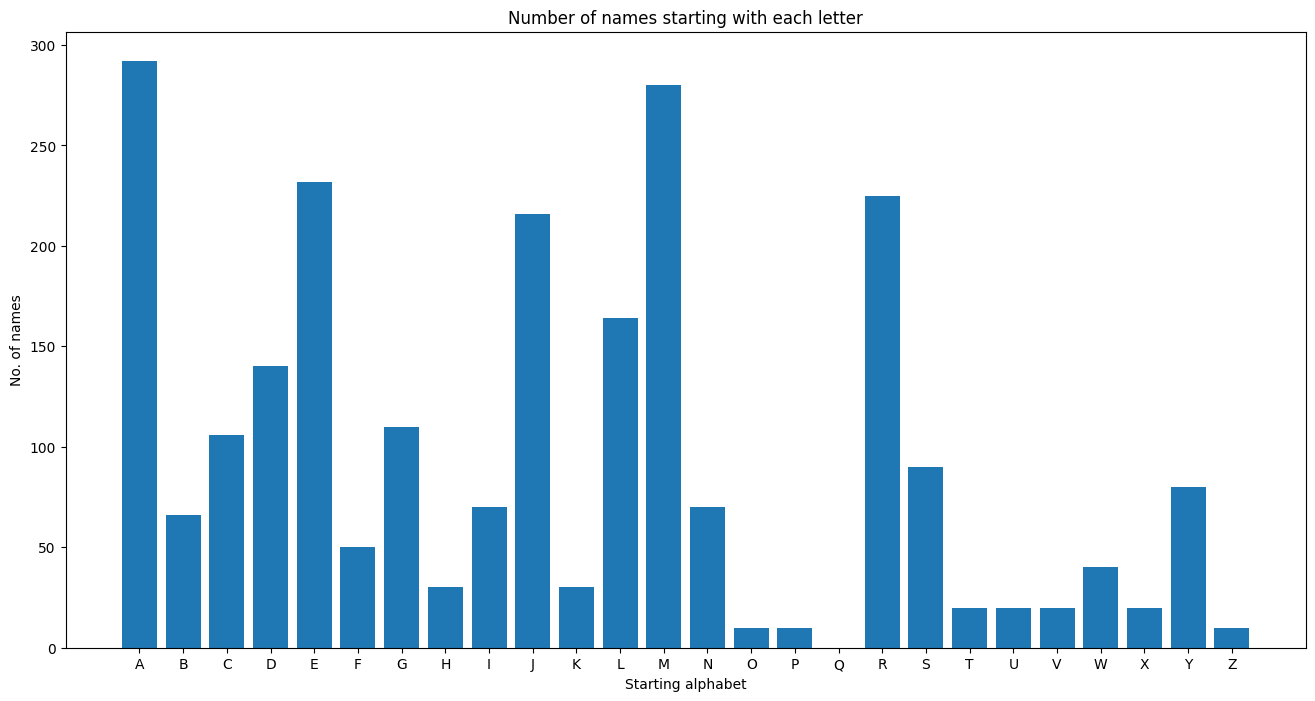

In [15]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [16]:
print('The 5 most name starting letters are : ',

       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('A', 292) ('M', 280) ('E', 232) ('R', 225) ('J', 216)


In [17]:
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:

    endletter_count[i]=len(dataset[dataset['Nombre'].str.endswith(i)])

print(endletter_count)

{'a': 696, 'b': 0, 'c': 0, 'd': 10, 'e': 160, 'f': 0, 'g': 10, 'h': 110, 'i': 30, 'j': 0, 'k': 20, 'l': 240, 'm': 20, 'n': 265, 'o': 320, 'p': 0, 'q': 0, 'r': 50, 's': 284, 't': 10, 'u': 1, 'v': 0, 'x': 0, 'y': 112, 'z': 20}


In [18]:
print('The 5 most name endind letters are : ', *sorted(endletter_count.items(),

        key=lambda item: item[1])[-5:][::-1])

The 5 most name endind letters are :  ('a', 696) ('o', 320) ('s', 284) ('n', 265) ('l', 240)


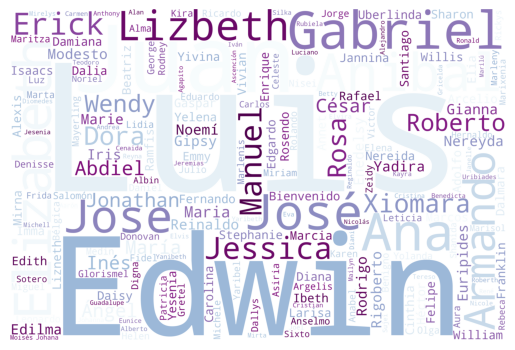

In [19]:
# building a word cloud

text =  " ".join(i for i in dataset.Nombre)

word_cloud = WordCloud(

        width=3000,

        height=2000,

        random_state=1,

        background_color="white",

        colormap="BuPu",

        collocations=False,

        stopwords= None,

        ).generate(text)

plt.imshow(word_cloud)

plt.axis("off")    

plt.show()

In [34]:
X1 =list(dataset['Nombre'])

Y = list(dataset['SXO'])

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

Y = encoder.fit_transform(Y)

In [36]:
print(Y)

[0 1 1 ... 0 0 0]


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='char')

X1=cv.fit_transform(X1).toarray()

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.30, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

In [56]:
# function for confusion matrix

from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

0.8112947658402204
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       341
           1       0.84      0.79      0.82       385

    accuracy                           0.81       726
   macro avg       0.81      0.81      0.81       726
weighted avg       0.81      0.81      0.81       726

[[285  56]
 [ 81 304]]
None


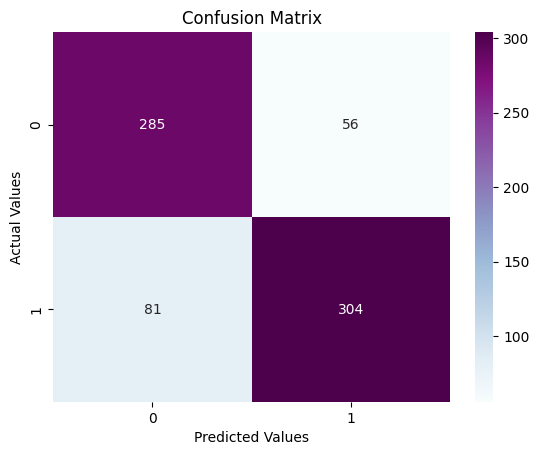

In [57]:
import sklearn.metrics as metrics

#for logistic regression

print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))

0.7754820936639119
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       341
           1       0.81      0.76      0.78       385

    accuracy                           0.78       726
   macro avg       0.78      0.78      0.78       726
weighted avg       0.78      0.78      0.78       726

[[272  69]
 [ 94 291]]
None


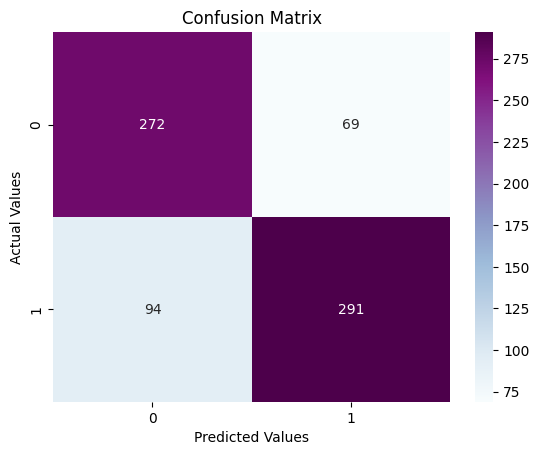

In [58]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:
class LSTMModel(nn.Module):
    def __init__(self, voc_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, 40)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm = nn.LSTM(40, 100, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(100, 64)
        self.dropout3 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout1(x)
        x = self.fc1(x[:, -1, :])
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [41]:
voc_size = 1000  # vocabulary size
model = LSTMModel(voc_size)
print(model)

LSTMModel(
  (embedding): Embedding(1000, 40)
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm): LSTM(40, 100, batch_first=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [42]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())


In [46]:
train_data = DataLoader(list(zip(x_train, y_train)), batch_size=64)

In [48]:
# Training loop with accuracy calculation
for epoch in range(100):
    correct = 0
    total = 0
    for inputs, targets in train_data:
        optimizer.zero_grad()
        outputs = model(inputs)

        # Fix the size mismatch
        targets = targets.view_as(outputs)
        
        # Convert targets to float
        targets = targets.float()

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    accuracy = correct / total
    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')


Epoch 1, Loss: 0.0076, Accuracy: 99.23%
Epoch 2, Loss: 1.5011, Accuracy: 96.10%
Epoch 3, Loss: 0.2292, Accuracy: 86.83%
Epoch 4, Loss: 0.1003, Accuracy: 95.69%
Epoch 5, Loss: 0.0397, Accuracy: 97.40%
Epoch 6, Loss: 0.0081, Accuracy: 98.52%
Epoch 7, Loss: 0.0056, Accuracy: 98.41%
Epoch 8, Loss: 0.0126, Accuracy: 98.82%
Epoch 9, Loss: 0.0123, Accuracy: 99.11%
Epoch 10, Loss: 0.0108, Accuracy: 99.23%
Epoch 11, Loss: 0.0028, Accuracy: 99.35%
Epoch 12, Loss: 0.0094, Accuracy: 99.17%
Epoch 13, Loss: 0.0099, Accuracy: 99.35%
Epoch 14, Loss: 0.0114, Accuracy: 99.11%
Epoch 15, Loss: 0.0223, Accuracy: 99.41%
Epoch 16, Loss: 0.0071, Accuracy: 99.23%
Epoch 17, Loss: 0.0127, Accuracy: 99.29%
Epoch 18, Loss: 0.0144, Accuracy: 99.17%
Epoch 19, Loss: 0.0078, Accuracy: 99.41%
Epoch 20, Loss: 0.0115, Accuracy: 99.35%
Epoch 21, Loss: 0.0146, Accuracy: 99.17%
Epoch 22, Loss: 0.0112, Accuracy: 99.11%
Epoch 23, Loss: 0.0099, Accuracy: 99.11%
Epoch 24, Loss: 0.0116, Accuracy: 99.41%
Epoch 25, Loss: 0.0054, A

In [61]:
def predict(name, model):
    name_samplevector = cv.transform([name]).toarray()
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for prediction
        inputs = torch.tensor(name_samplevector)  # Convert input to tensor
        outputs = model(inputs)  # Get model output

    prediction = outputs.item()  # Get the prediction value

    if prediction >= 0.5:
        out = 'Male ♂'
    else:
        out = 'Female ♀'

    print(name + ' is a ' + out)

# You can use the function like this:

predict("Edwin", model)

Edwin is a Female ♀
